In [59]:
# Dependencies and Setup
import os 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [60]:
consump_path = os.path.join("..", "data", "state_consumption.csv")
consump_df= pd.read_csv(consump_path)
consump_df.head(63)

,States,Residential,Unnamed: 2,Commercial,Unnamed: 4,Industrial,Unnamed: 6,Transportation,Unnamed: 8,All Sectors_Mwh,Unnamed: 10
0,New England,4020.0,3376.0,3854.0,4183.0,1285.0,1210.0,33.0,38.0,9192.0,8807.0
1,Connecticut,1172.0,944.0,992.0,1040.0,249.0,238.0,8.0,10.0,2421.0,2232.0
2,Maine,371.0,331.0,291.0,308.0,244.0,143.0,0.0,0.0,907.0,782.0
3,Massachusetts,1642.0,1406.0,1773.0,2019.0,465.0,498.0,25.0,26.0,3904.0,3949.0
4,New Hampshire,395.0,323.0,335.0,352.0,161.0,161.0,0.0,0.0,891.0,836.0
...,...,...,...,...,...,...,...,...,...,...,...
58,Pacific Noncontiguous,388.0,366.0,401.0,465.0,365.0,408.0,0.0,0.0,1154.0,1239.0
59,Alaska,140.0,131.0,187.0,209.0,100.0,97.0,0.0,0.0,427.0,436.0
60,Hawaii,248.0,235.0,214.0,256.0,264.0,311.0,0.0,0.0,727.0,803.0
61,U.S. Total,131248.0,119519.0,108654.0,115338.0,75225.0,80618.0,481.0,612.0,315608.0,316087.0


In [61]:
price_path = os.path.join("..", "data", "state_price.csv")
price_df= pd.read_csv(price_path)
price_df.head(63)

,States,Residential,Unnamed: 2,Commercial,Unnamed: 4,Industrial,Unnamed: 6,Transportation,Unnamed: 8,All Sectors_cents per Kwh,Unnamed: 10
0,New England,20.47,21.20,15.39,16.35,12.38,13.11,7.23,8.91,17.16,17.73
1,Connecticut,21.73,23.10,16.51,17.60,13.03,13.85,10.67,16.39,18.66,19.52
2,Maine,16.91,18.18,12.64,12.40,8.53,9.24,--,--,13.28,14.26
3,Massachusetts,21.01,21.36,15.18,16.53,13.87,14.25,5.26,5.2,17.41,17.89
4,New Hampshire,19.00,20.34,15.26,15.65,12.72,12.66,--,--,16.46,16.88
...,...,...,...,...,...,...,...,...,...,...,...
58,Pacific Noncontiguous,27.16,29.26,23.97,25.56,21.06,23.80,--,--,24.13,26.07
59,Alaska,23.85,23.51,20.45,20.45,17.55,17.06,--,--,20.89,20.62
60,Hawaii,29.03,32.45,27.04,29.72,22.40,25.90,--,--,26.03,29.04
61,U.S. Total,13.28,13.36,10.96,10.88,6.95,6.91,10.44,10.06,10.97,10.80


In [62]:
state_df = pd.merge(price_df, consump_df, on = ['States'], how = 'outer')

state_df.head(64)

,States,Residential_x,Unnamed: 2_x,Commercial_x,Unnamed: 4_x,Industrial_x,Unnamed: 6_x,Transportation_x,Unnamed: 8_x,All Sectors_cents per Kwh,...,Residential_y,Unnamed: 2_y,Commercial_y,Unnamed: 4_y,Industrial_y,Unnamed: 6_y,Transportation_y,Unnamed: 8_y,All Sectors_Mwh,Unnamed: 10_y
0,New England,20.47,21.20,15.39,16.35,12.38,13.11,7.23,8.91,17.16,...,4020.0,3376.0,3854.0,4183.0,1285.0,1210.0,33.0,38.0,9192.0,8807.0
1,Connecticut,21.73,23.10,16.51,17.60,13.03,13.85,10.67,16.39,18.66,...,1172.0,944.0,992.0,1040.0,249.0,238.0,8.0,10.0,2421.0,2232.0
2,Maine,16.91,18.18,12.64,12.40,8.53,9.24,--,--,13.28,...,371.0,331.0,291.0,308.0,244.0,143.0,0.0,0.0,907.0,782.0
3,Massachusetts,21.01,21.36,15.18,16.53,13.87,14.25,5.26,5.2,17.41,...,1642.0,1406.0,1773.0,2019.0,465.0,498.0,25.0,26.0,3904.0,3949.0
4,New Hampshire,19.00,20.34,15.26,15.65,12.72,12.66,--,--,16.46,...,395.0,323.0,335.0,352.0,161.0,161.0,0.0,0.0,891.0,836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Alaska,23.85,23.51,20.45,20.45,17.55,17.06,--,--,20.89,...,140.0,131.0,187.0,209.0,100.0,97.0,0.0,0.0,427.0,436.0
60,Hawaii,29.03,32.45,27.04,29.72,22.40,25.90,--,--,26.03,...,248.0,235.0,214.0,256.0,264.0,311.0,0.0,0.0,727.0,803.0
61,U.S. Total,13.28,13.36,10.96,10.88,6.95,6.91,10.44,10.06,10.97,...,131248.0,119519.0,108654.0,115338.0,75225.0,80618.0,481.0,612.0,315608.0,316087.0
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
state_group = state_df.groupby('States')
state_priceVScon = state_group['All Sectors_cents per Kwh', "All Sectors_Mwh"].mean()
state_priceVScon


<ipython-input-63-c86426ee77a3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_priceVScon = state_group['All Sectors_cents per Kwh', "All Sectors_Mwh"].mean()


,All Sectors_cents per Kwh,All Sectors_Mwh
States,,
Alabama,10.38,7192.0
Alaska,20.89,427.0
Arizona,11.23,7832.0
Arkansas,8.70,3735.0
California,18.78,21272.0
...,...,...
West North Central,10.71,24852.0
West South Central,8.50,54073.0
West Virginia,8.80,2477.0


In [64]:

plt.figure(figsize=(15,6))
state_priceVScon = state_priceVScon.sort_values(ascending=False)
cost_chart = state_priceVScon.plot(kind='bar')
cost_chart.set_xlabel("State")
cost_chart.set_ylabel("Cost Index Price (USD)")

plt.show()

TypeError: sort_values() missing 1 required positional argument: 'by'

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

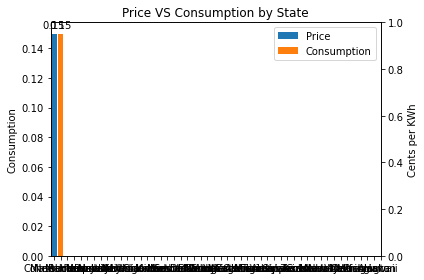

In [68]:

labels = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey',
          'New York', 'Pennsylvania', 'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa',
          'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', 'Delaware', 'Florida',
          'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama',
          'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Arizona',
          'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'California', 'Oregon', 
          'Washington', 'Alaska', 'Hawaii']


price_means = [ ]
consump_means = [ ]

x = np.arange(len(labels)) 
width = 0.15  

plt.figure(figsize=(15,6))
fig, ax = plt.subplots()
rects1 = ax.bar(['All Sectors_cents per Kwh'], width, label='Price')
rects2 = ax.bar(['All Sectors_Mwh'], width, label='Consumption')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Consumption')
ax.set_title('Price VS Consumption by State')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.set_ylabel("Cents per KWh")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

               
plt.show()